In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import sys
sys.path.append("../../")
# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import  soporte_ajuste_logistica as sal

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\ruipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_pickle("../../datos/06_datos_balanceados.pkl")

In [3]:
df.shape

(1491, 95)

# Regresion Logística

In [4]:
params_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.005, 0.01,0.05, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10,20,40,100,150]
}

In [5]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression",param_grid = params_logistic,ruta_guardar_modelo="../../datos/encoders_y_modelos",nombre_modelo_guardar="logistic_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.005, 0.01, 0.05, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [10, 20, 40, 100, 150]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
LogisticRegression(C=1, max_iter=40, penalty='l1', random_state=42,
                   solver='saga')
-------------------------------------------------


### Matriz Logistica

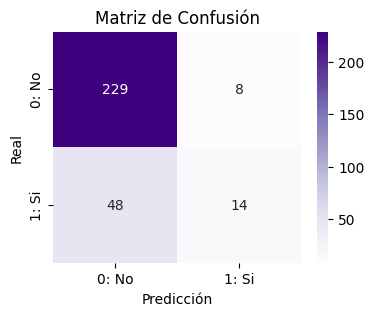

In [6]:
logistica.plot_matriz_confusion("logistic_regression",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 229 Verdaderos Negativos
- 8 Falsos Positivos (Al final no se van)
- 48 Falsos Negativos (Al final si se van)
- 14 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [7]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_logistica = logistica.calcular_metricas(modelo_nombre =  "logistic_regression").T
df_logistica["modelo"] = "logistic_regression"
df_logistica

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.866611,0.852397,0.866611,0.837833,0.321321,0.819950,logistic_regression
test,0.812709,0.787244,0.812709,0.775404,0.252099,0.704573,logistic_regression


### Curva ROC

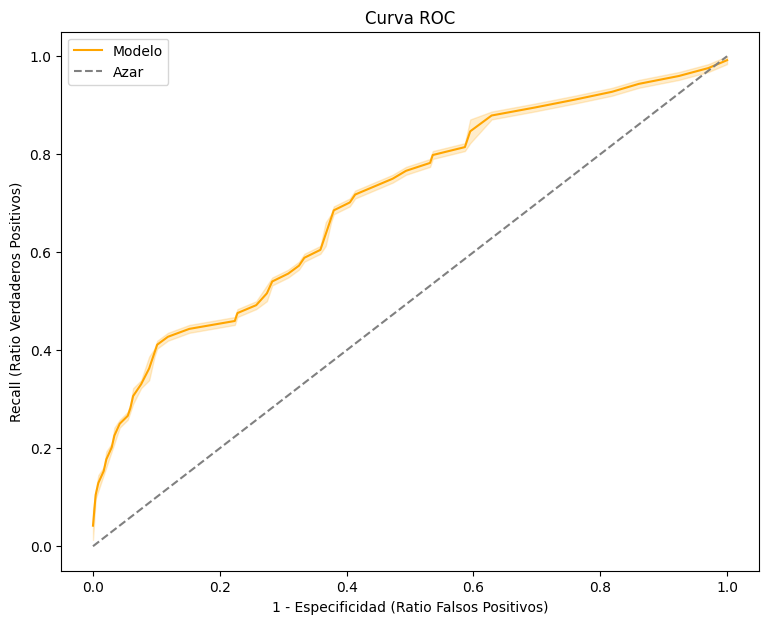

In [8]:
logistica.plot_curva_ROC()

### Importancia

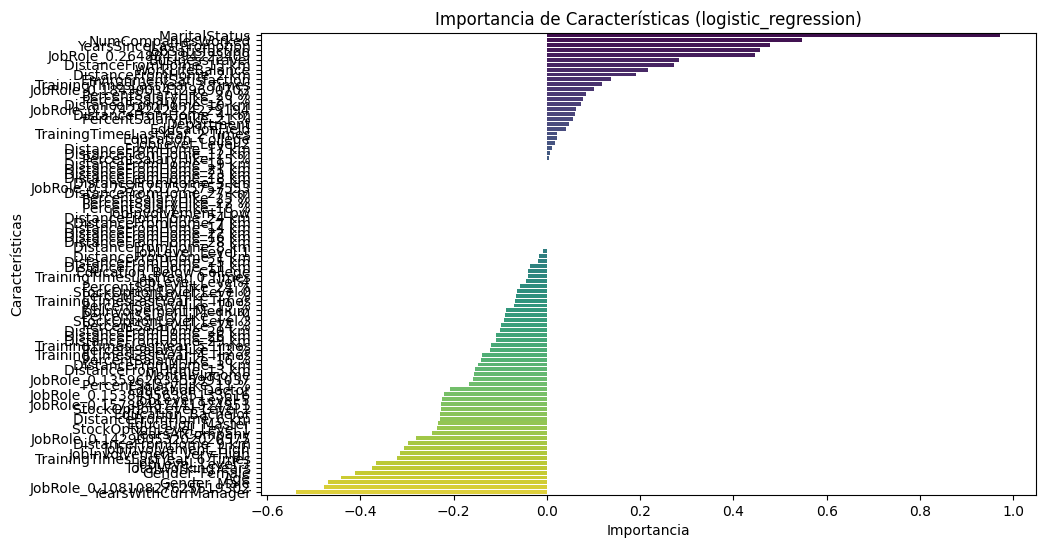

In [9]:
# Mostramos la importancia de los predictores en el modelo regresión logística
logistica.importancia_predictores(modelo_nombre ='logistic_regression')

### Shap Plots

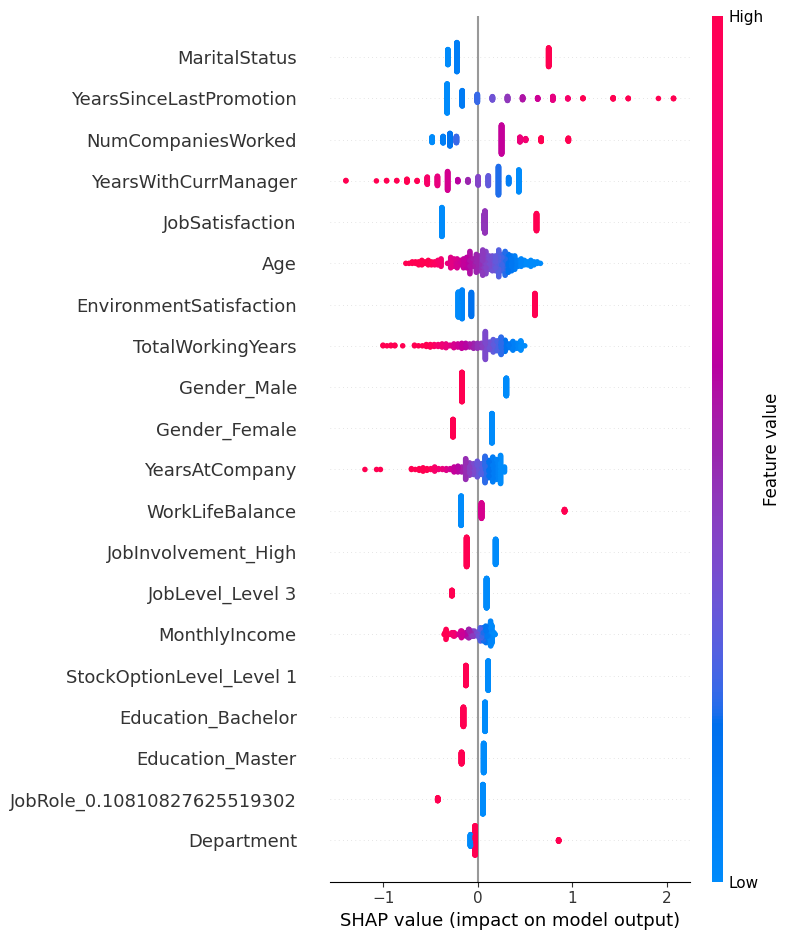

In [10]:
logistica.plot_shap_summary(modelo_nombre ='logistic_regression')

# Decision Tree

In [11]:
# instanciamos la clase de regresión logistica
decision_tree = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
decision_tree.ajustar_modelo("tree",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="decision_tree_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=3, random_state=42)
-------------------------------------------------


### Matriz Logistica

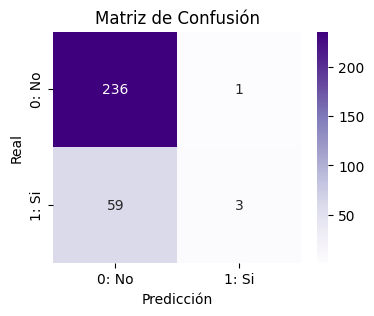

In [12]:
decision_tree.plot_matriz_confusion("tree",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 236 Verdaderos Negativos
-  1 Falso Positivos (Al final no se van)
- 59 Falsos Negativos (Al final si se van)
- 3 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [13]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_tree = decision_tree.calcular_metricas(modelo_nombre =  "tree").T
df_tree["modelo"] = "decision_tree"
df_resultados_final = pd.concat([df_logistica, df_tree], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.866611,0.852397,0.866611,0.837833,0.321321,0.819950,logistic_regression
test,0.812709,0.787244,0.812709,0.775404,0.252099,0.704573,logistic_regression
train,0.852349,0.843725,0.852349,0.800730,0.147076,0.727154,decision_tree
test,0.799331,0.789632,0.799331,0.722097,0.067471,0.619607,decision_tree


### Curva ROC

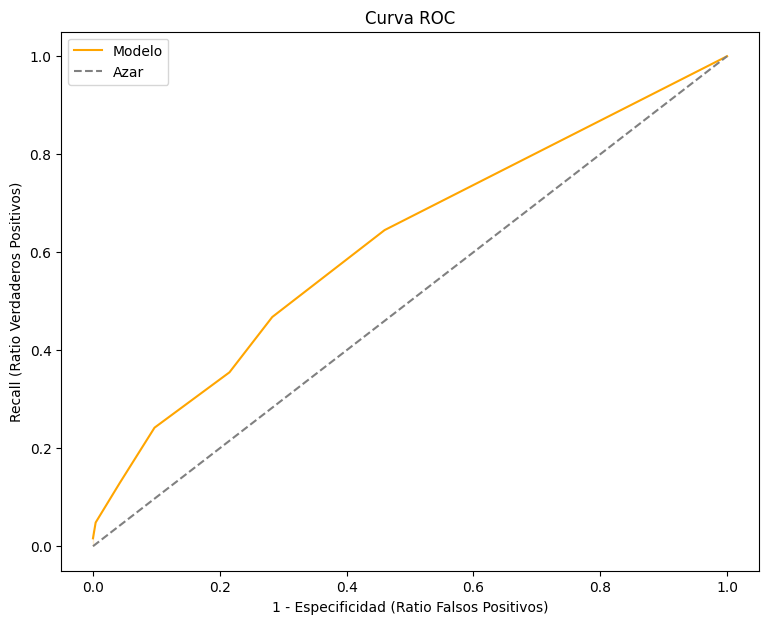

In [14]:
decision_tree.plot_curva_ROC()

### Importancia

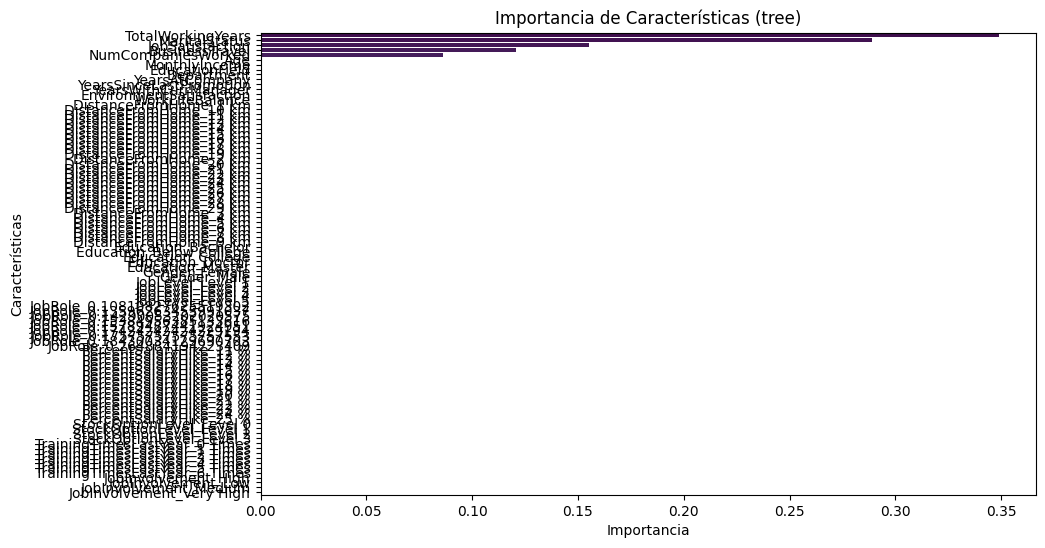

In [15]:
# Mostramos la importancia de los predictores en el modelo regresión logística
decision_tree.importancia_predictores(modelo_nombre ='tree')

### Shap Plots

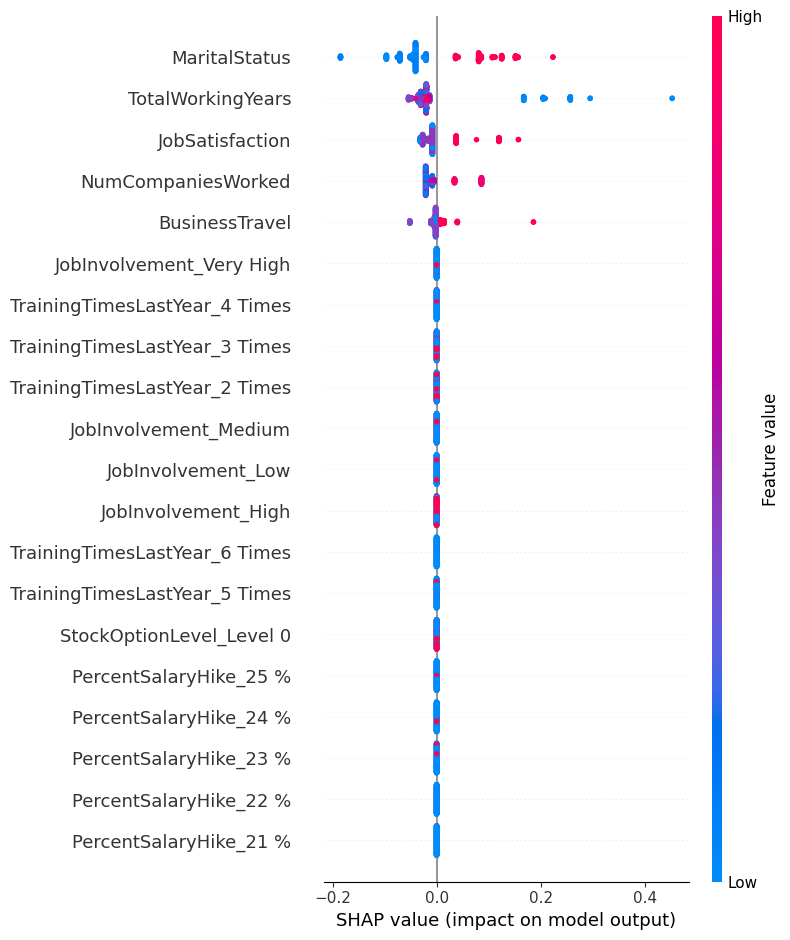

In [16]:
decision_tree.plot_shap_summary(modelo_nombre ='tree')

# Random Forest

In [17]:
# instanciamos la clase de regresión logistica
random_forest = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
random_forest.ajustar_modelo("random_forest",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="random_forest.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
-------------------------------------------------


### Matriz Logistica

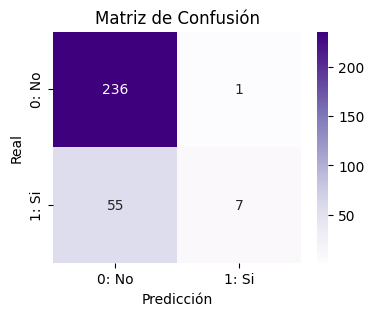

In [18]:
random_forest.plot_matriz_confusion("random_forest",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 236 Verdaderos Negativos
- 1 Falso Positivo (Al final no se van)
- 55 Falsos Negativos (Al final si se van)
- 7 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [19]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_random = random_forest.calcular_metricas(modelo_nombre = "random_forest").T
df_random["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_random], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.866611,0.852397,0.866611,0.837833,0.321321,0.819950,logistic_regression
test,0.812709,0.787244,0.812709,0.775404,0.252099,0.704573,logistic_regression
train,0.852349,0.843725,0.852349,0.800730,0.147076,0.727154,decision_tree
test,0.799331,0.789632,0.799331,0.722097,0.067471,0.619607,decision_tree
train,0.999161,0.999162,0.999161,0.999160,0.996863,1.000000,random_forest
test,0.812709,0.824268,0.812709,0.750046,0.160197,0.731965,random_forest


### Curva ROC

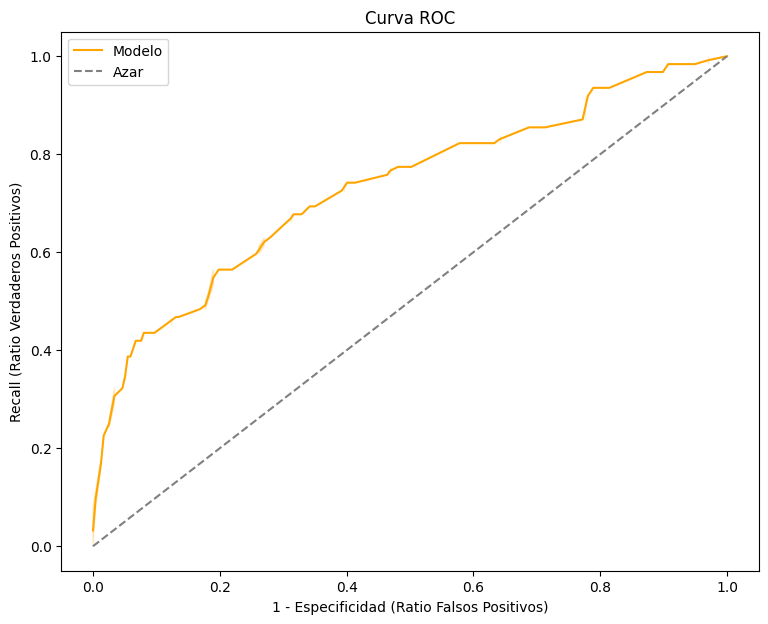

In [20]:
random_forest.plot_curva_ROC()

### Importancia

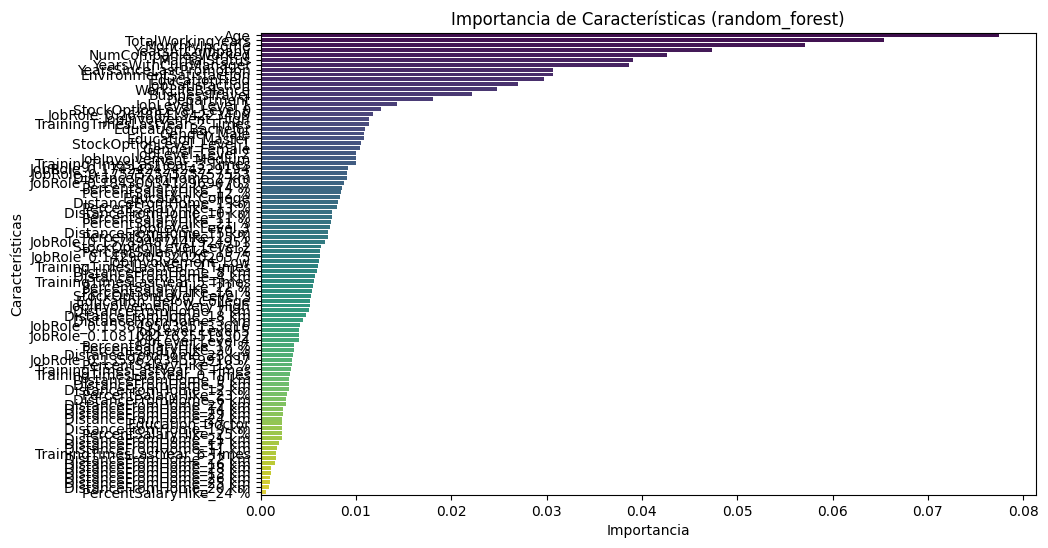

In [21]:
# Mostramos la importancia de los predictores en el modelo regresión logística
random_forest.importancia_predictores(modelo_nombre ='random_forest')

### Shap Plots

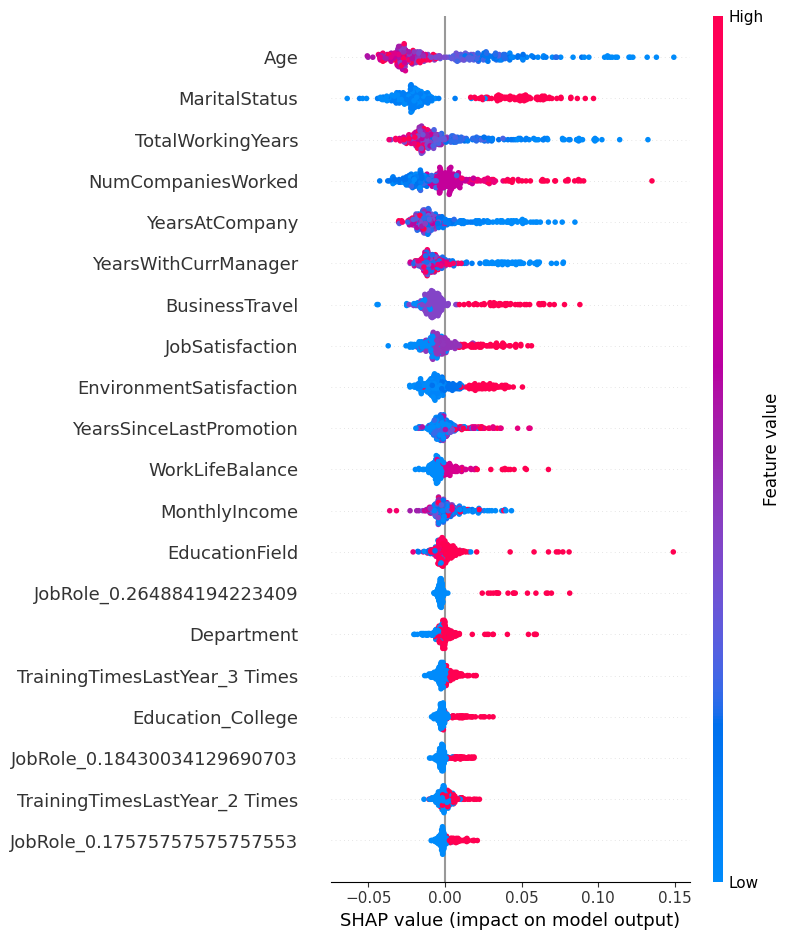

In [22]:
random_forest.plot_shap_summary(modelo_nombre ='random_forest')

# Gradient Boosting

In [23]:
# instanciamos la clase de regresión logistica
gradient_boosting = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
gradient_boosting.ajustar_modelo("gradient_boosting",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="gradient_boosting_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(min_samples_leaf=4, random_state=42, subsample=0.8)
-------------------------------------------------


### Matriz Logistica

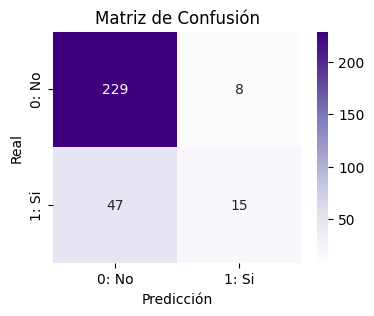

In [24]:
gradient_boosting.plot_matriz_confusion("gradient_boosting",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 226 Verdaderos Negativos
-  8 Falsos positivos (Al final no se van)
- 47 Falsos Negativos (Al final si se van)
- 15 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [25]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_gradient = gradient_boosting.calcular_metricas(modelo_nombre = "gradient_boosting").T
df_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_gradient], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.866611,0.852397,0.866611,0.837833,0.321321,0.819950,logistic_regression
test,0.812709,0.787244,0.812709,0.775404,0.252099,0.704573,logistic_regression
train,0.852349,0.843725,0.852349,0.800730,0.147076,0.727154,decision_tree
test,0.799331,0.789632,0.799331,0.722097,0.067471,0.619607,decision_tree
train,0.999161,0.999162,0.999161,0.999160,0.996863,1.000000,random_forest
test,0.812709,0.824268,0.812709,0.750046,0.160197,0.731965,random_forest
train,0.928691,0.932652,0.928691,0.920418,0.678337,0.974850,gradient_boosting
test,0.816054,0.792897,0.816054,0.780846,0.271152,0.702600,gradient_boosting


### Curva ROC

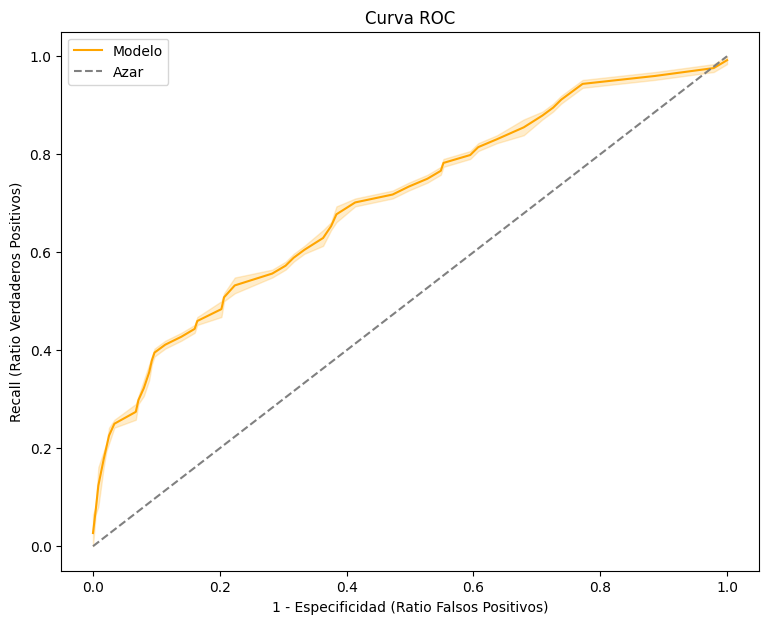

In [26]:
gradient_boosting.plot_curva_ROC()

### Importancia

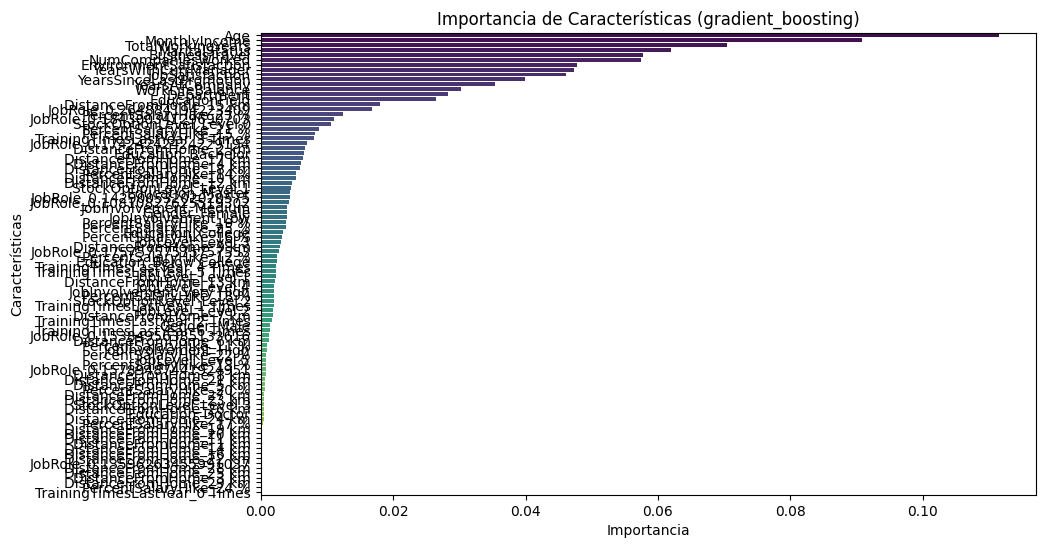

In [27]:
# Mostramos la importancia de los predictores en el modelo regresión logística
gradient_boosting.importancia_predictores(modelo_nombre ='gradient_boosting')

### Shap Plots

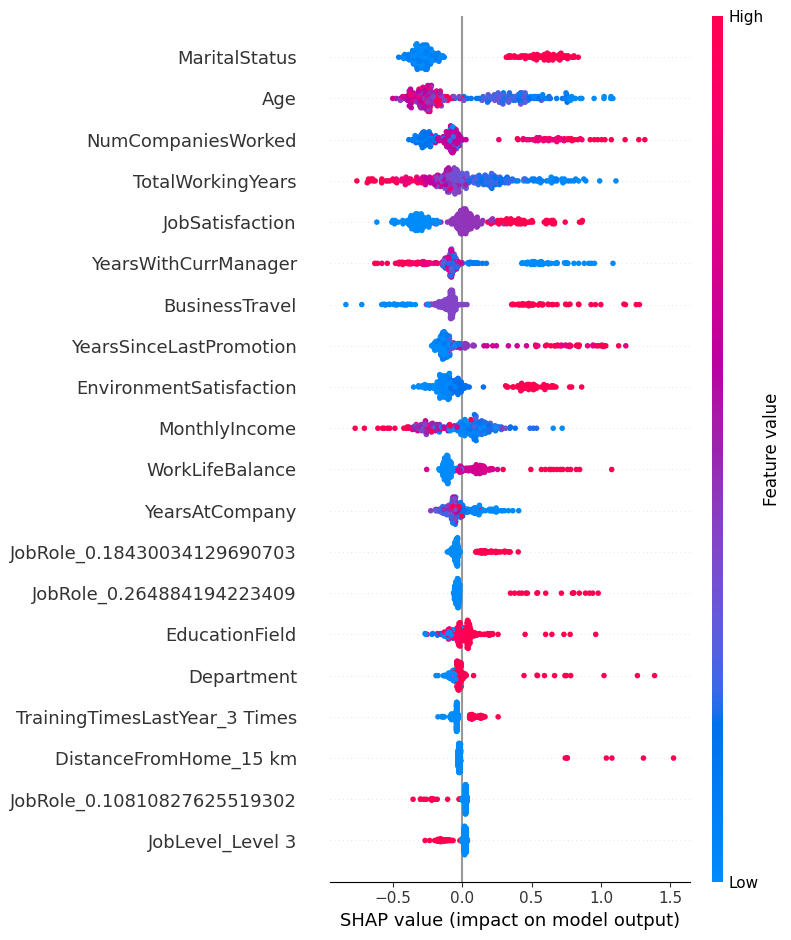

In [28]:
gradient_boosting.plot_shap_summary(modelo_nombre ='gradient_boosting')

# XGBooster

In [29]:
# instanciamos la clase de regresión logistica
xgbooster = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition",train_size=0.8)

# llamamos a la función para ajustar el modelo
xgbooster.ajustar_modelo("xgboost",ruta_guardar_modelo="../../datos/encoders_y_modelos/",nombre_modelo_guardar="XGBooster.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------


### Matriz Logistica

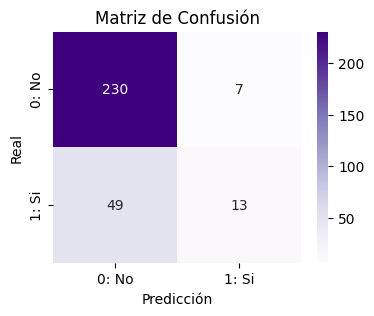

In [30]:
xgbooster.plot_matriz_confusion("xgboost",invertir=False,labels=True,label0="No",label1="Si")

### Sobre la Matriz
- 230 Verdaderos Negativos
-  7 Falso Positivos (Al final no se van)
- 49 Falsos Negativos (Al final si se van)
- 13 Verdaderos Positivos 


### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [31]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_xgboost = xgbooster.calcular_metricas(modelo_nombre = "xgboost").T
df_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_xgboost], axis = 0)
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.866611,0.852397,0.866611,0.837833,0.321321,0.819950,logistic_regression
test,0.812709,0.787244,0.812709,0.775404,0.252099,0.704573,logistic_regression
train,0.852349,0.843725,0.852349,0.800730,0.147076,0.727154,decision_tree
test,0.799331,0.789632,0.799331,0.722097,0.067471,0.619607,decision_tree
train,0.999161,0.999162,0.999161,0.999160,0.996863,1.000000,random_forest
test,0.812709,0.824268,0.812709,0.750046,0.160197,0.731965,random_forest
train,0.928691,0.932652,0.928691,0.920418,0.678337,0.974850,gradient_boosting
test,0.816054,0.792897,0.816054,0.780846,0.271152,0.702600,gradient_boosting
train,0.914430,0.915113,0.914430,0.903675,0.608964,0.954207,xgboost
test,0.812709,0.788215,0.812709,0.772367,0.240221,0.723697,xgboost


### Curva ROC

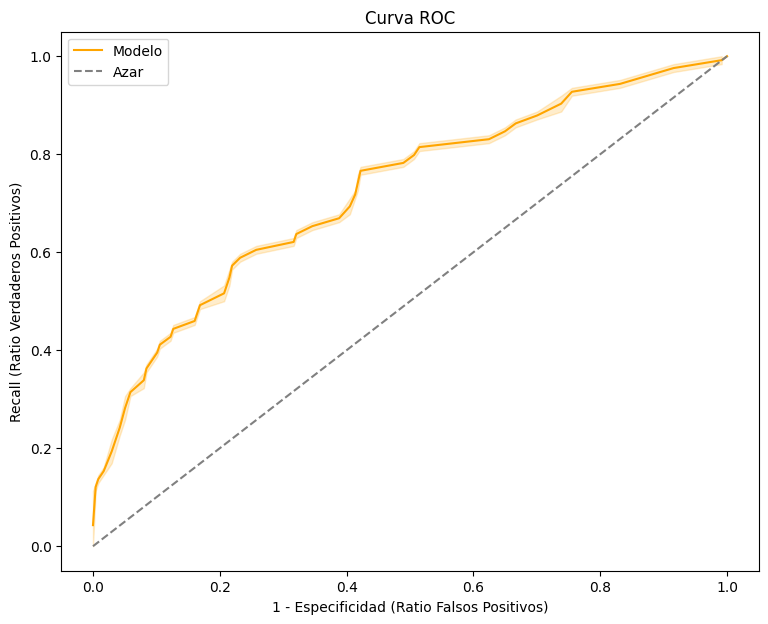

In [32]:
xgbooster.plot_curva_ROC()

### Importancia

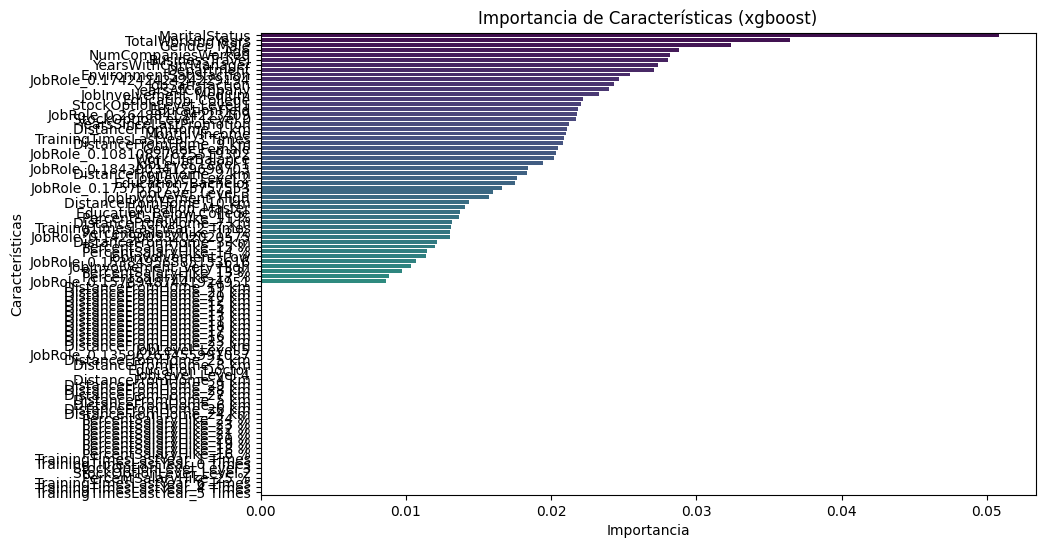

In [33]:
# Mostramos la importancia de los predictores en el modelo regresión logística
xgbooster.importancia_predictores(modelo_nombre ='xgboost')

### Shap Plots

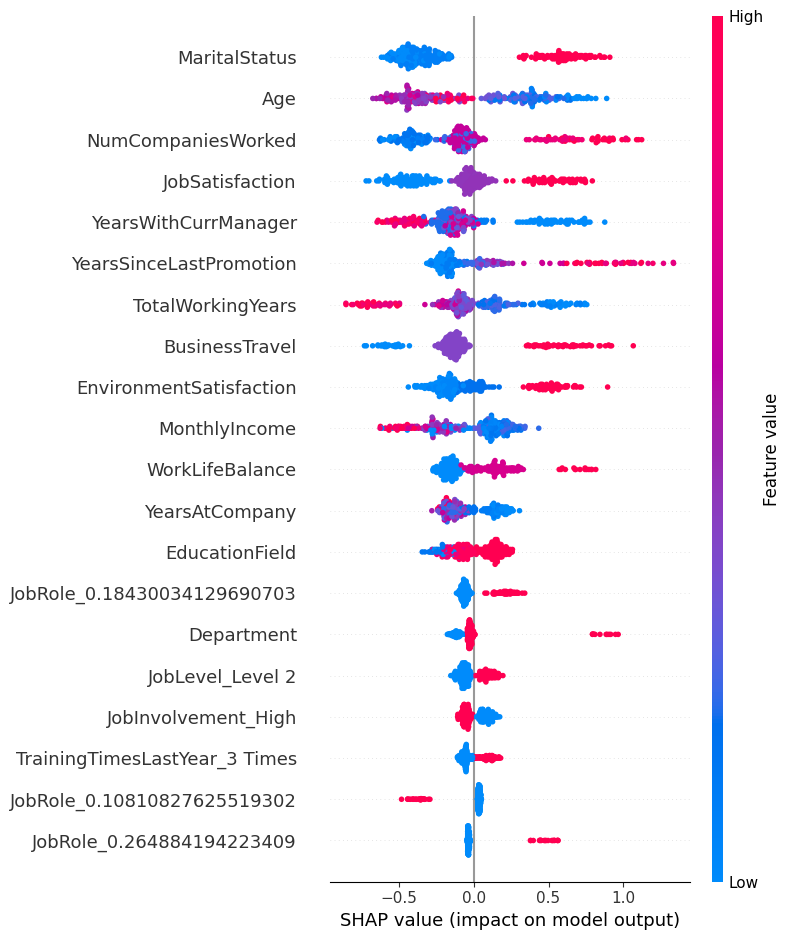

In [34]:
xgbooster.plot_shap_summary(modelo_nombre ='xgboost')

# Comparación de todos

In [35]:
df_colores = df_resultados_final.copy()

In [36]:
df_colores.reset_index(inplace=True)
df_colores = df_colores.rename(columns = {"index":"tipo"})
df_colores = df_colores.style.apply(sal.color_filas_por_modelo,axis=1)
df_colores


,tipo,accuracy,precision,recall,f1,kappa,auc,modelo
0,train,0.866611,0.852397,0.866611,0.837833,0.321321,0.819950,logistic_regression
1,test,0.812709,0.787244,0.812709,0.775404,0.252099,0.704573,logistic_regression
2,train,0.852349,0.843725,0.852349,0.800730,0.147076,0.727154,decision_tree
3,test,0.799331,0.789632,0.799331,0.722097,0.067471,0.619607,decision_tree
4,train,0.999161,0.999162,0.999161,0.999160,0.996863,1.000000,random_forest
5,test,0.812709,0.824268,0.812709,0.750046,0.160197,0.731965,random_forest
6,train,0.928691,0.932652,0.928691,0.920418,0.678337,0.974850,gradient_boosting
7,test,0.816054,0.792897,0.816054,0.780846,0.271152,0.702600,gradient_boosting
8,train,0.914430,0.915113,0.914430,0.903675,0.608964,0.954207,xgboost
9,test,0.812709,0.788215,0.812709,0.772367,0.240221,0.723697,xgboost


# Conclusión
- Todos los modelos tienen overfitting
- Esto indica que se aprende muy bien los datos
- E indica que los datos desbalanceados no se pueden usar